In [1]:
import pandas as pd

In [4]:
df = pd.DataFrame({'A': ['a','b','c','a','b'],
                   'B' : [1, 2, 3, 1, 0]})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


### Label encoder 

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [6]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [9]:
df['le_A']=le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [10]:
# fit 과 transform 한번에 수행 
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [11]:
# 다시 문자로 변경 
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

### min_mas scaling


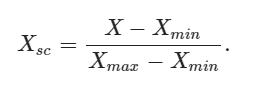

In [12]:
df = pd.DataFrame({'A': [10, 20, -10, 0, 25],
                   'B' : [1, 2, 3, 1, 0]})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [14]:
mms.data_max_, mms.data_min_, mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [15]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [16]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

### Standard Scare



In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [18]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [19]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### Robust Scaler
Robust Scaler는 중앙값(median)과 사분위 범위(interquartile range, IQR)를 사용하여 데이터를 정규화

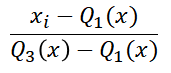

In [25]:
df = pd.DataFrame({'A': [-.1, 0., .1, .2, .3, .4, 1., 1.1, 5.]})

df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [27]:
df_scaler = df.copy()

df_scaler['MinMax']=mm.fit_transform(df)
df_scaler['Standard']=ss.fit_transform(df)
df_scaler['Robust']=rs.fit_transform(df)

In [28]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


In [39]:
# %load ../set_matplotlib_hangul.py

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

path='C:/Windows/Fonts/malgun.ttf'
plt.rcParams['axes.unicode_minus'] = False

if platform.system()=="Darwin": #mac
    rc("font",family='Arial Unicodes MS')
    sns.set(font='Arial Unicodes MS', 
        rc={"axes.unicode_minus":False}),
    print('MAC Hangul OK')
elif platform.system()=="Windows":  #window
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc("font",family=font_name)
    sns.set(font=font_name, 
    rc={"axes.unicode_minus":False})
    print('WIndow Hangul OK')
    
else:
    print('Unknown System')
    


WIndow Hangul OK


<Axes: >

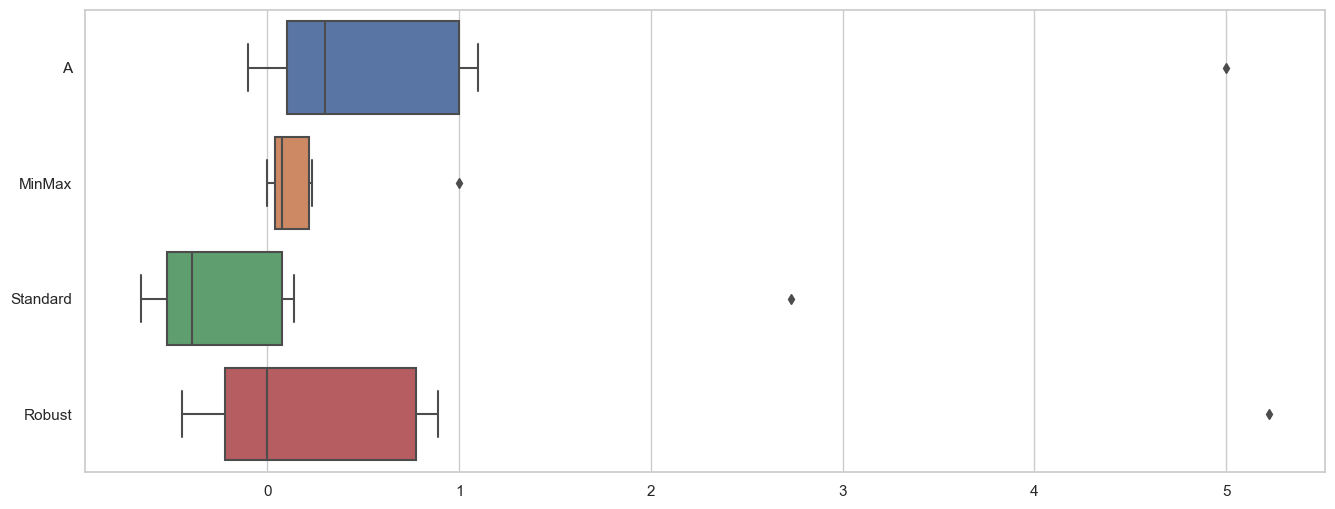

In [49]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient='h')

### 스케일러 정리
```
        1. 데이터 분포의 형태
        데이터가 정규 분포와 유사한 형태를 가지고 있다면, Standard Scaler를 사용하는 것이 적합할 수 있습니다. 
        이는 데이터를 평균을 중심으로 표준편차의 배수로 정규화하기 때문입니다.
        데이터가 정규 분포와 다소 차이가 있거나, 비대칭 분포를 가지고 있다면, Robust Scaler를 사용할 수 있습니다. 
        Robust Scaler는 중앙값을 기준으로 사분위 범위로 정규화하므로, 이상치의 영향을 상대적으로 줄일 수 있습니다.
        
        2. 이상치의 처리
        데이터에 이상치가 포함되어 있다면, 이상치에 민감한 MinMax Scaler보다는 Robust Scaler를 사용하는 것이 적합합니다. 
        Robust Scaler는 이상치에 영향을 덜 받으며, 데이터를 중앙값과 사분위 범위로 정규화하기 때문에 이상치에 민감하지 않습니다.
       
        3. 알고리즘의 요구사항
        몇몇 머신러닝 알고리즘은 데이터의 범위나 분포에 민감할 수 있습니다. 
        예를 들어, 거리 기반 알고리즘인 k-NN 또는 군집화 알고리즘인 K-means는 데이터의 스케일에 영향을 받을 수 있습니다. 
        이런 경우에는 데이터를 표준화 또는 정규화하는 스케일러를 사용하여 알고리즘의 성능을 향상시킬 수 있습니다.
        
        4. 도메인 지식과 문제의 특성
        도메인 지식이나 문제의 특성에 따라 특정 스케일러를 선호할 수 있습니다. 
        예를 들어, 이미지 처리 분야에서는 MinMax Scaler를 사용하여 픽셀 값을 0과 1 사이로 정규화하는 것이 일반적입니다.
        결론적으로, 데이터 특성에 따라 스케일러를 선택하는 것은 문제의 복잡성과 알고리즘의 요구사항을 고려하여 결정되어야 합니다. 
        데이터의 분포, 이상치 여부, 알고리즘의 특성 등을 종합적으로 고려하여 적절한 스케일러를 선택하는 것이 중요합니다.

```

----

### Decision Tree를 이용한 와인 데이터 분석 


In [57]:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')


In [56]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [59]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [62]:
red_wine['color'] = 1 #red
white_wine['color'] = 0 #white


wine = pd.concat([red_wine,white_wine])

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [64]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [65]:
wine['quality'].unique() # 0-10 까지 등급

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [66]:
import plotly_express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [67]:

fig = px.histogram(wine, x='quality', color='color')
fig.show()

In [69]:
X = wine.drop(['color'], axis=1)
y = wine['color'] 

In [72]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [74]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

In [75]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x = X_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x = X_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

wine_tree=DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [78]:
from sklearn.metrics import accuracy_score

y_pred_tr=wine_tree.predict(X_train) 
y_pred_test = wine_tree.predict(X_test)

In [80]:
accuracy_score(y_train,y_pred_tr)

0.9553588608812776

In [81]:
accuracy_score(y_test,y_pred_test)

0.9569230769230769

### 데이터 전처리
- minmax
- standard

In [82]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y=X['quality'], name = 'quality'))
fig.show()



In [84]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm = MinMaxScaler()
ss = StandardScaler()

ss.fit(X)
mm.fit(X)

X_ss = ss.transform(X)
X_mm = mm.transform(X)

In [87]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mm_pd = pd.DataFrame(X_mm, columns=X.columns)

X_ss_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


In [88]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name = 'quality'))
fig.show()


In [89]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mm_pd['fixed acidity'], name = 'fixed acidity'))
fig.add_trace(go.Box(y=X_mm_pd['chlorides'], name = 'chlorides'))
fig.add_trace(go.Box(y=X_mm_pd['quality'], name = 'quality'))
fig.show()

### MinMaxScaler 를 이용해서 학습

In [95]:
X_train,X_test,y_train,t_test = train_test_split(X_mm_pd, y, test_size=0.2, random_state=13)

wine_tree=DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train,y_pred_tr))
print(accuracy_score(y_test,y_pred_test))


0.9553588608812776
0.9569230769230769


### Standard Scaler 

In [96]:
X_train,X_test,y_train,t_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

wine_tree=DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train,y_pred_tr))
print(accuracy_score(y_test,y_pred_test))



0.9553588608812776
0.9569230769230769


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


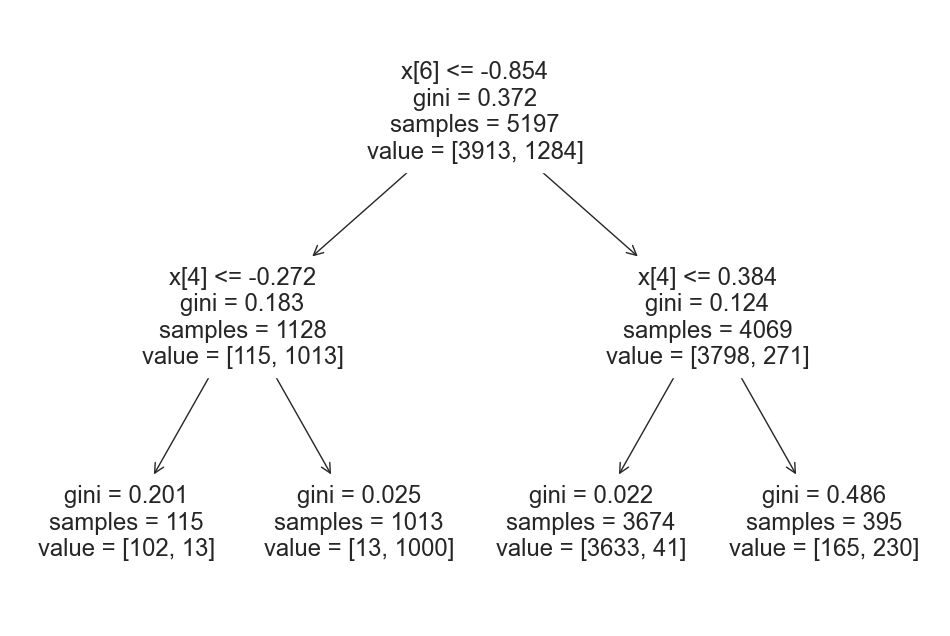

In [98]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(wine_tree);

print(X.columns)

### 레드와인과 화이트와인을 구분하는 중요 특성

In [99]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

### 와인 맛에 대한 분류

In [102]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1.0


In [103]:
X = wine.drop(['taste'],axis=1)
Y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=13)

#### 정확도 100% 가 나옴 -> 의심해봐야함  

In [104]:
y_pred_test = wine_tree.predict(X_test)
y_pred_tr = wine_tree.predict(X_train)

print(f'Train Acc : {accuracy_score(y_train, y_pred_tr)}')
print(f'Train Acc : {accuracy_score(y_test, y_pred_test)}')

Train Acc : 1.0
Train Acc : 1.0


#### 내가 taste를 구분한 기준인 quality 를 지우지 않고 학습시켰기 때문에 100%가 나옴 

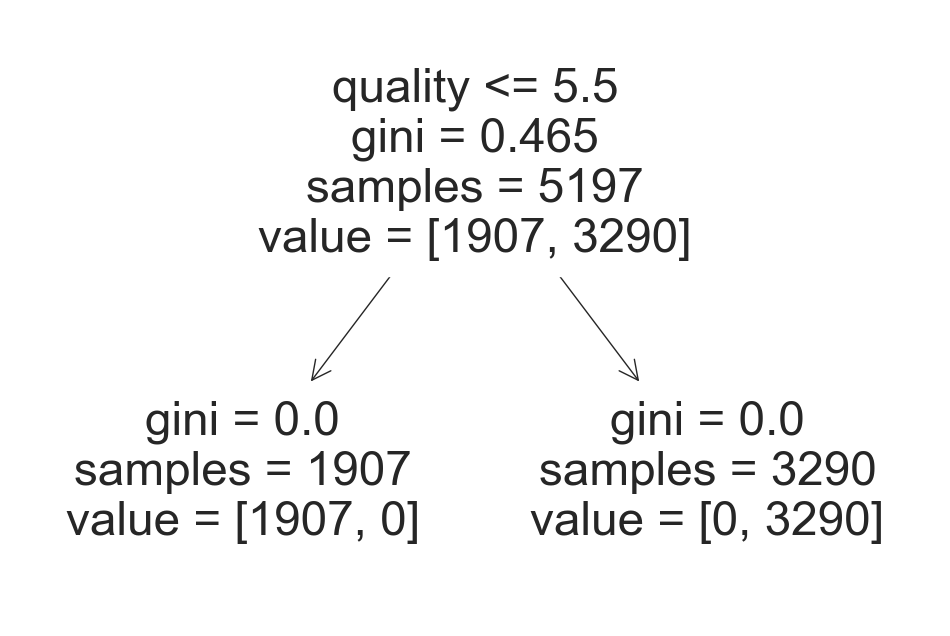

In [107]:
plt.figure(figsize=(12,8))
plot_tree(wine_tree, feature_names=X.columns);

#### quality 컬럼을 지우고 다시 학습

In [109]:
X = wine.drop(['taste','quality'],axis=1)
Y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=13)

In [110]:
y_pred_test = wine_tree.predict(X_test)
y_pred_tr = wine_tree.predict(X_train)

print(f'Train Acc : {accuracy_score(y_train, y_pred_tr)}')
print(f'Train Acc : {accuracy_score(y_test, y_pred_test)}')

Train Acc : 0.7294593034442948
Train Acc : 0.7161538461538461


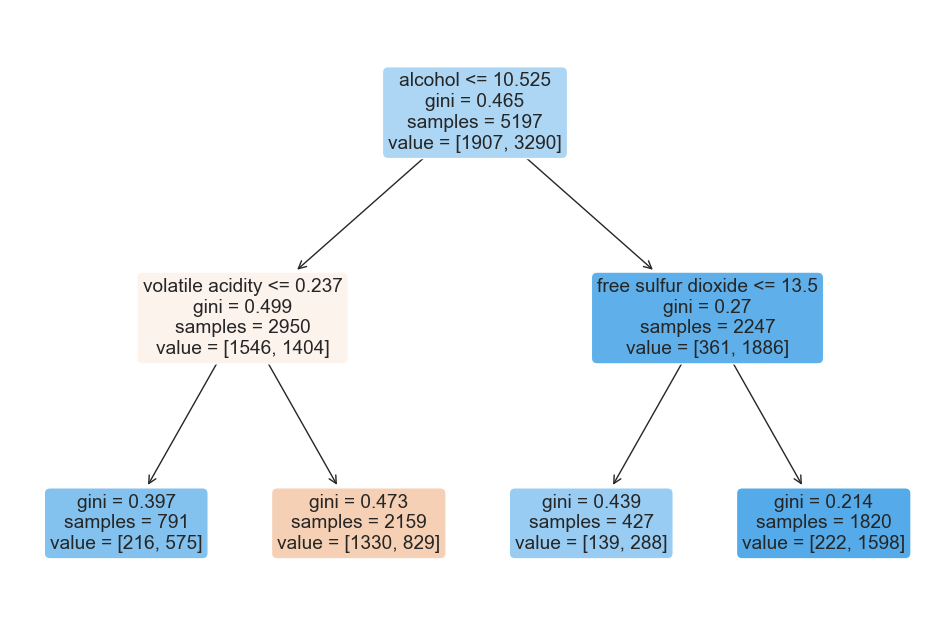

In [113]:
plt.figure(figsize=(12,8))
plot_tree(wine_tree, 
          feature_names=X.columns, 
          filled=True,
          rounded=True);